In [2]:
# Titnic Survival Prediction Model - This model aims to predict if a passenger will survive on the ship

#Importing the necessary Libraries required.
import pandas as pd
import numpy as num
import seaborn as sea
import matplotlib.pyplot as mat
from pandas import DataFrame


#After successfully importing the libraries , its time to load the Data.
TitanicDATA: DataFrame=pd.read_csv('D:/Internships/Codsoft/task 1/tested.csv')
print(TitanicDATA)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
#Checking the data
print(TitanicDATA.describe()) #it checks the statistics of the data
print(TitanicDATA.shape) #Counts the number of rows and columns


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  
(418, 12)


0    266
1    152
Name: Survived, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


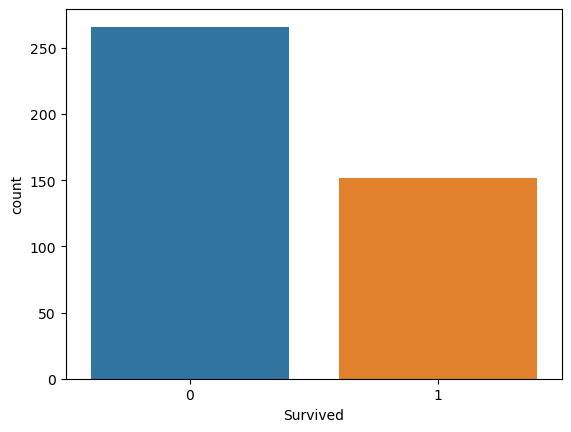

In [4]:
#Now counting the number of Survivors and visualizing it
print(TitanicDATA['Survived'].value_counts())
print(sea.countplot(x='Survived', data= TitanicDATA))
#this visualization show the number of people survived out of total passengers is less as compared to the passenger
#who did not survive

AxesSubplot(0.125,0.11;0.775x0.77)
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


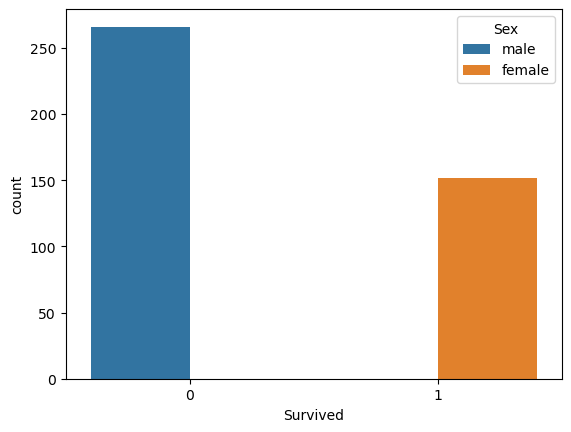

In [5]:
#Now, we compare the number of males and females survived
print(sea.countplot(x='Survived', hue='Sex',data=TitanicDATA))
print(TitanicDATA.groupby('Sex')['Survived'].mean()) #(this is the survival rate)
#From this analysis we found out that more females are likely to survive as compared to males

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


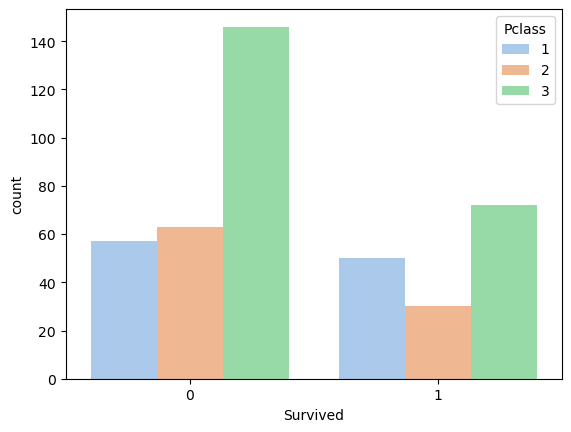

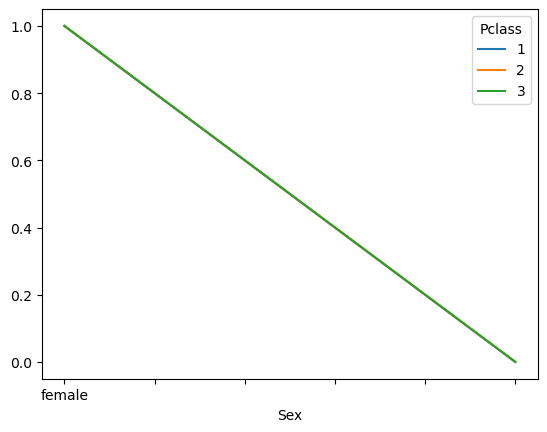

In [6]:
#Now checking the survival rate according to the Passenger class
print(sea.countplot(x='Survived', hue='Pclass',data=TitanicDATA, palette='pastel'))
print(TitanicDATA.pivot_table('Survived', index='Sex', columns='Pclass').plot()) #this shows the survival rate by Sex and class
#From this plot, we found that Ist class passenger are more likely to survive as compared to IInd or IIIrd class,
#and the majority of passengers who did not survive belongs to IIIrd class

AxesSubplot(0.125,0.11;0.775x0.77)


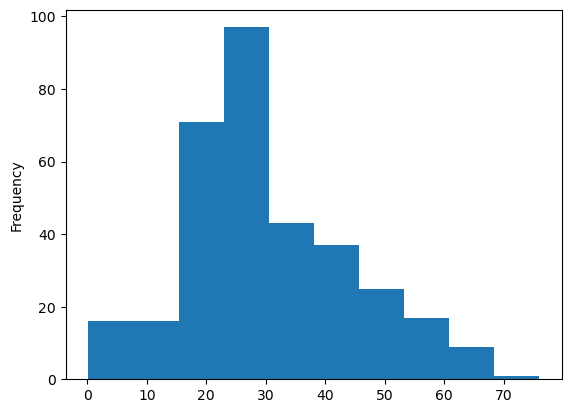

In [7]:
#Age group Analysis
print(TitanicDATA['Age'].plot.hist())
#This histogram plot shows that young people (20-40) are travelling in highest number as compared to elder people (60-70)

AxesSubplot(0.125,0.11;0.775x0.77)


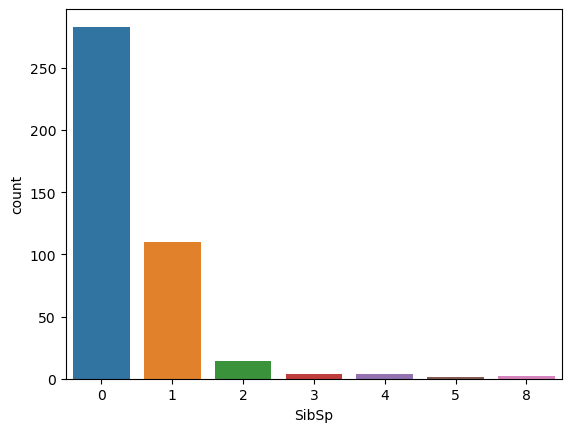

In [8]:
#Checking how many passengers are travelling with their siblings
print(sea.countplot(x='SibSp', data=TitanicDATA))
#this plot implies that most of the passenger are not travelling with their siblings

In [9]:
#DATA CLEANING
x = TitanicDATA.isnull().sum() #this shows all the null values
print(x)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
#dropping the unnecessary columns and removing all the null values
TitanicDATA.drop(['Cabin', 'Name', 'PassengerId','Ticket'],axis=1, inplace=True)
TitanicDATA.dropna(inplace=True) #(Replaces all the Null values)
print(TitanicDATA)


     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.5      0      0    7.8292        Q
1           1       3  female  47.0      1      0    7.0000        S
2           0       2    male  62.0      0      0    9.6875        Q
3           0       3    male  27.0      0      0    8.6625        S
4           1       3  female  22.0      1      1   12.2875        S
..        ...     ...     ...   ...    ...    ...       ...      ...
409         1       3  female   3.0      1      1   13.7750        S
411         1       1  female  37.0      1      0   90.0000        Q
412         1       3  female  28.0      0      0    7.7750        S
414         1       1  female  39.0      0      0  108.9000        C
415         0       3    male  38.5      0      0    7.2500        S

[331 rows x 8 columns]


In [11]:
#checking data types
print(TitanicDATA.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [12]:
#converting the data type
print(TitanicDATA['Sex'].unique())

from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()

TitanicDATA['Sex'] = ln.fit_transform(TitanicDATA['Sex'])
sex = TitanicDATA['Sex']

TitanicDATA['Embarked'] = ln.fit_transform(TitanicDATA['Embarked'])
embark = TitanicDATA['Embarked']

TitanicDATA['Pclass'] = ln.fit_transform(TitanicDATA['Pclass'])
PCL = TitanicDATA['Pclass']


['male' 'female']


In [13]:
#creating new data set
titanic = pd.concat([TitanicDATA, sex, embark, PCL], axis=1)

In [14]:
#dropping columns
titanic.drop(['Pclass', 'Sex','Embarked'],axis=1,inplace=True)
print(titanic)
print(titanic.dtypes)

     Survived   Age  SibSp  Parch      Fare
0           0  34.5      0      0    7.8292
1           1  47.0      1      0    7.0000
2           0  62.0      0      0    9.6875
3           0  27.0      0      0    8.6625
4           1  22.0      1      1   12.2875
..        ...   ...    ...    ...       ...
409         1   3.0      1      1   13.7750
411         1  37.0      1      0   90.0000
412         1  28.0      0      0    7.7750
414         1  39.0      0      0  108.9000
415         0  38.5      0      0    7.2500

[331 rows x 5 columns]
Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object


In [15]:
#TRAINING THE MODEL
a = titanic.drop('Survived', axis=1)
b = titanic['Survived']
from sklearn.model_selection import train_test_split
#splitting the data into training and testing
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [16]:
#machine learning model
from sklearn.linear_model import LogisticRegression
loRe = LogisticRegression(random_state=0)
loRe.fit(a_train,b_train)
prediction = loRe.predict(a_test)

In [17]:
#MODEL PREDICTION
print(prediction)

[0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


In [18]:
print(b_test)

71     0
90     1
166    0
74     1
66     1
      ..
363    0
215    0
373    0
320    0
308    0
Name: Survived, Length: 67, dtype: int64
